In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
from keras import regularizers
import os

In [3]:
mylist= os.listdir(R'C:\Users\kesar\OneDrive\Desktop\6th SEMESTER\DEEP LEARNING\PROJECT\Ravdees')

In [4]:
len(mylist)

1440

# Plotting the audio file's waveform and its spectrogram

In [5]:
data, sampling_rate = librosa.load(r'C:\Users\kesar\Downloads\Audio_Song_Actors_01-24\Actor_01\03-02-01-01-01-01-01.wav')

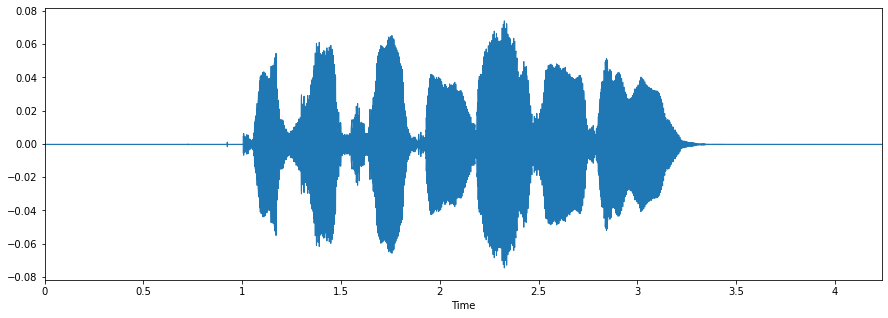

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Setting the labels

In [7]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [8]:
import pandas as pd
labels = pd.DataFrame(feeling_list)

In [9]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


# Getting the features of audio files using librosa

In [10]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('C:/Users/kesar/OneDrive/Desktop/6th SEMESTER/DEEP LEARNING/PROJECT/Ravdees/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [11]:
df[:5]

,feature
0,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."
1,"[-65.70765, -65.70765, -63.11472, -61.518997, ..."
2,"[-65.4825, -65.4825, -65.4825, -65.4825, -65.4..."
3,"[-64.52845, -64.52845, -64.52845, -64.52845, -..."
4,"[-62.36431, -59.934727, -61.869602, -67.49577,..."


In [12]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [13]:
newdf = pd.concat([df3,labels], axis=1)

In [14]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [15]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-57.447464,-58.896500,-58.750996,-57.405678,-60.078484,-63.426800,-62.638542,-61.082741,-60.234661,male_calm
1,-65.707649,-65.707649,-63.114719,-61.518997,-61.097141,-63.424599,-63.720066,-56.854614,-55.168972,-54.639999,...,-39.792141,-40.613159,-41.209202,-41.439201,-43.994286,-49.399620,-50.591599,-49.144051,-48.705654,female_calm
2,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,...,-31.346556,-34.310772,-35.800705,-35.936115,-37.631844,-40.119411,-41.662888,-41.323643,-40.710770,male_calm
3,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-65.928223,...,-48.674301,-48.596073,-47.602745,-43.049198,-42.659542,-43.188560,-44.001240,-43.610100,-44.698246,female_calm
4,-62.364311,-59.934727,-61.869602,-67.495773,-71.071808,-65.679817,-63.394402,-65.503349,-61.856644,-60.005428,...,-39.071327,-41.897121,-40.865437,-38.290604,-36.372398,-37.915779,-40.026127,-43.383774,-43.965401,male_calm


In [16]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
415,-54.541561,-52.652214,-52.555290,-53.107361,-53.001789,-52.325142,-51.463894,-53.362495,-53.288208,-54.680244,...,-54.983257,-55.473412,-54.866707,-58.022640,-57.014259,-52.991421,-52.545437,-53.893307,-55.545368,female_sad
107,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.376183,-65.081703,-61.741520,-61.251682,...,-39.053535,-36.484768,-36.410343,-35.979633,-36.072109,-36.145523,-36.861732,-31.365255,-27.897572,female_calm
818,-58.422295,-58.422295,-58.535198,-58.431622,-57.747078,-57.535255,-58.422295,-58.398277,-58.344955,-58.380264,...,-46.481239,-45.848122,-48.013794,-46.745735,-46.297085,-48.637230,-49.142128,-47.933006,-48.412834,male_fearful
34,-64.875465,-56.527523,-54.121284,-55.752113,-56.003075,-55.568741,-55.626640,-56.577690,-55.229820,-55.994156,...,-48.745186,-48.936172,-49.602459,-51.278950,-55.084087,-57.043373,-56.340080,-56.364014,-56.574608,male_calm
659,-60.162758,-60.162758,-60.162758,-58.697639,-59.117779,-59.412739,-59.935528,-60.093319,-59.892723,-59.975914,...,-30.452293,-31.879854,-32.237930,-32.714520,-35.066200,-37.909229,-39.740765,-40.632664,-39.565922,female_angry
185,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,...,-66.036102,-64.665848,-62.797356,-65.690765,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,female_calm
954,-45.079411,-45.182930,-45.832737,-45.270958,-44.004986,-43.305984,-43.619041,-44.168438,-45.227715,-46.027554,...,-34.175652,-34.334332,-35.172134,-36.398491,-33.733013,-32.789333,-31.659161,-24.270390,-19.262936,male_fearful
305,-40.588501,-40.581081,-40.605572,-40.649174,-40.645645,-40.654911,-40.655983,-40.645634,-40.632099,-40.652573,...,-37.957699,-37.451443,-39.119522,-39.735294,-40.298767,-40.656857,-40.656857,-40.656857,-40.656857,female_happy
15,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,...,-52.096539,-54.628349,-61.964287,-61.394615,-57.863480,-54.479099,-57.676800,-60.145386,-63.907143,female_calm
22,-60.877060,-60.643517,-62.531578,-65.584305,-65.793449,-65.793449,-65.793449,-65.793449,-65.793449,-63.589069,...,-27.550606,-27.640730,-28.515852,-29.205854,-30.009361,-30.119699,-33.493782,-36.200535,-38.832481,male_calm


In [17]:
rnewdf=rnewdf.fillna(0)

# Dividing the data into test and train

In [18]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
107,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.376183,-65.081703,-61.741520,-61.251682,...,-39.053535,-36.484768,-36.410343,-35.979633,-36.072109,-36.145523,-36.861732,-31.365255,-27.897572,female_calm
818,-58.422295,-58.422295,-58.535198,-58.431622,-57.747078,-57.535255,-58.422295,-58.398277,-58.344955,-58.380264,...,-46.481239,-45.848122,-48.013794,-46.745735,-46.297085,-48.637230,-49.142128,-47.933006,-48.412834,male_fearful
185,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,...,-66.036102,-64.665848,-62.797356,-65.690765,-66.227669,-66.227669,-66.227669,-66.227669,-66.227669,female_calm
954,-45.079411,-45.182930,-45.832737,-45.270958,-44.004986,-43.305984,-43.619041,-44.168438,-45.227715,-46.027554,...,-34.175652,-34.334332,-35.172134,-36.398491,-33.733013,-32.789333,-31.659161,-24.270390,-19.262936,male_fearful
15,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,-68.325424,...,-52.096539,-54.628349,-61.964287,-61.394615,-57.863480,-54.479099,-57.676800,-60.145386,-63.907143,female_calm


In [20]:
trainfeatures = train.iloc[:, :-1]

In [21]:
trainlabel = train.iloc[:, -1:]

In [22]:
testfeatures = test.iloc[:, :-1]

In [23]:
testlabel = test.iloc[:, -1:]

In [24]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\kesar\anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape

(765, 216)

# Changing dimension for CNN model

In [27]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [28]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           8

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [31]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))

Epoch 1/500
48/48 [==============================] - 4s 76ms/step - loss: 2.4407 - accuracy: 0.1007 - val_loss: 2.2979 - val_accuracy: 0.0974
Epoch 2/500
48/48 [==============================] - 3s 63ms/step - loss: 2.2742 - accuracy: 0.1412 - val_loss: 2.2479 - val_accuracy: 0.1538
Epoch 3/500
48/48 [==============================] - 3s 64ms/step - loss: 2.2436 - accuracy: 0.1765 - val_loss: 2.2188 - val_accuracy: 0.1436
Epoch 4/500
48/48 [==============================] - 3s 61ms/step - loss: 2.2224 - accuracy: 0.1935 - val_loss: 2.2035 - val_accuracy: 0.1949
Epoch 5/500
48/48 [==============================] - 3s 64ms/step - loss: 2.2016 - accuracy: 0.1961 - val_loss: 2.2000 - val_accuracy: 0.1897
Epoch 6/500
48/48 [==============================] - 3s 64ms/step - loss: 2.1817 - accuracy: 0.2092 - val_loss: 2.1708 - val_accuracy: 0.2359
Epoch 7/500
48/48 [==============================] - 3s 63ms/step - loss: 2.1661 - accuracy: 0.2118 - val_loss: 2.1690 - val_accuracy: 0.2103
Epoch 

48/48 [==============================] - 3s 66ms/step - loss: 1.2937 - accuracy: 0.5190 - val_loss: 1.4569 - val_accuracy: 0.4410
Epoch 116/500
48/48 [==============================] - 3s 69ms/step - loss: 1.2903 - accuracy: 0.5333 - val_loss: 1.3923 - val_accuracy: 0.4564
Epoch 117/500
48/48 [==============================] - 3s 68ms/step - loss: 1.2931 - accuracy: 0.5373 - val_loss: 1.4368 - val_accuracy: 0.4256
Epoch 118/500
48/48 [==============================] - 3s 71ms/step - loss: 1.2811 - accuracy: 0.5425 - val_loss: 1.3983 - val_accuracy: 0.4615
Epoch 119/500
48/48 [==============================] - 3s 72ms/step - loss: 1.2827 - accuracy: 0.5320 - val_loss: 1.3962 - val_accuracy: 0.4667
Epoch 120/500
48/48 [==============================] - 3s 66ms/step - loss: 1.2834 - accuracy: 0.5373 - val_loss: 1.4694 - val_accuracy: 0.4308
Epoch 121/500
48/48 [==============================] - 3s 70ms/step - loss: 1.2759 - accuracy: 0.5307 - val_loss: 1.6296 - val_accuracy: 0.3897
Epoch 

Epoch 172/500
48/48 [==============================] - 4s 74ms/step - loss: 1.1513 - accuracy: 0.5804 - val_loss: 1.3667 - val_accuracy: 0.4513
Epoch 173/500
48/48 [==============================] - 4s 74ms/step - loss: 1.1527 - accuracy: 0.5739 - val_loss: 1.4409 - val_accuracy: 0.4462
Epoch 174/500
48/48 [==============================] - 4s 75ms/step - loss: 1.1616 - accuracy: 0.5843 - val_loss: 1.3928 - val_accuracy: 0.4718
Epoch 175/500
48/48 [==============================] - 3s 69ms/step - loss: 1.1452 - accuracy: 0.5791 - val_loss: 1.3589 - val_accuracy: 0.4667
Epoch 176/500
48/48 [==============================] - 3s 71ms/step - loss: 1.1471 - accuracy: 0.5961 - val_loss: 1.4224 - val_accuracy: 0.4718
Epoch 177/500
48/48 [==============================] - 4s 74ms/step - loss: 1.1486 - accuracy: 0.5974 - val_loss: 1.3831 - val_accuracy: 0.4564
Epoch 178/500
48/48 [==============================] - 4s 74ms/step - loss: 1.1381 - accuracy: 0.5895 - val_loss: 1.5186 - val_accuracy:

Epoch 229/500
48/48 [==============================] - 4s 74ms/step - loss: 1.0587 - accuracy: 0.6327 - val_loss: 1.3971 - val_accuracy: 0.4615
Epoch 230/500
48/48 [==============================] - 3s 64ms/step - loss: 1.0528 - accuracy: 0.6222 - val_loss: 1.4418 - val_accuracy: 0.4462
Epoch 231/500
48/48 [==============================] - 3s 69ms/step - loss: 1.0593 - accuracy: 0.6183 - val_loss: 1.3711 - val_accuracy: 0.4718
Epoch 232/500
48/48 [==============================] - 3s 67ms/step - loss: 1.0518 - accuracy: 0.6340 - val_loss: 1.4346 - val_accuracy: 0.4410
Epoch 233/500
48/48 [==============================] - 4s 73ms/step - loss: 1.0439 - accuracy: 0.6379 - val_loss: 1.3991 - val_accuracy: 0.4615
Epoch 234/500
48/48 [==============================] - 3s 69ms/step - loss: 1.0414 - accuracy: 0.6458 - val_loss: 1.3539 - val_accuracy: 0.4974
Epoch 235/500
48/48 [==============================] - 3s 66ms/step - loss: 1.0393 - accuracy: 0.6275 - val_loss: 1.4750 - val_accuracy:

Epoch 342/500
48/48 [==============================] - 3s 70ms/step - loss: 0.8733 - accuracy: 0.7176 - val_loss: 1.3652 - val_accuracy: 0.4974
Epoch 343/500
48/48 [==============================] - 3s 69ms/step - loss: 0.8615 - accuracy: 0.7229 - val_loss: 1.4059 - val_accuracy: 0.4769
Epoch 344/500
48/48 [==============================] - 3s 72ms/step - loss: 0.8501 - accuracy: 0.6941 - val_loss: 1.4781 - val_accuracy: 0.4615
Epoch 345/500
48/48 [==============================] - 3s 72ms/step - loss: 0.8601 - accuracy: 0.7098 - val_loss: 1.4236 - val_accuracy: 0.4410
Epoch 346/500
48/48 [==============================] - 3s 71ms/step - loss: 0.8604 - accuracy: 0.7046 - val_loss: 1.4029 - val_accuracy: 0.4974
Epoch 347/500
48/48 [==============================] - 3s 66ms/step - loss: 0.8694 - accuracy: 0.7033 - val_loss: 1.3697 - val_accuracy: 0.4974
Epoch 348/500
48/48 [==============================] - 3s 70ms/step - loss: 0.8543 - accuracy: 0.7033 - val_loss: 1.4472 - val_accuracy:

Epoch 399/500
48/48 [==============================] - 3s 71ms/step - loss: 0.7772 - accuracy: 0.7451 - val_loss: 1.4400 - val_accuracy: 0.4923
Epoch 400/500
48/48 [==============================] - 3s 73ms/step - loss: 0.7769 - accuracy: 0.7281 - val_loss: 1.3992 - val_accuracy: 0.5077
Epoch 401/500
48/48 [==============================] - 4s 74ms/step - loss: 0.7660 - accuracy: 0.7320 - val_loss: 1.3920 - val_accuracy: 0.4974
Epoch 402/500
48/48 [==============================] - 3s 73ms/step - loss: 0.7651 - accuracy: 0.7412 - val_loss: 1.4268 - val_accuracy: 0.4769
Epoch 403/500
48/48 [==============================] - 3s 67ms/step - loss: 0.7682 - accuracy: 0.7503 - val_loss: 1.4124 - val_accuracy: 0.4769
Epoch 404/500
48/48 [==============================] - 3s 73ms/step - loss: 0.7753 - accuracy: 0.7438 - val_loss: 1.4086 - val_accuracy: 0.5077
Epoch 405/500
48/48 [==============================] - 4s 73ms/step - loss: 0.7639 - accuracy: 0.7412 - val_loss: 1.4203 - val_accuracy:

Epoch 456/500
48/48 [==============================] - 3s 62ms/step - loss: 0.6780 - accuracy: 0.7791 - val_loss: 1.4145 - val_accuracy: 0.4974
Epoch 457/500
48/48 [==============================] - 3s 67ms/step - loss: 0.6735 - accuracy: 0.7817 - val_loss: 1.4642 - val_accuracy: 0.4667
Epoch 458/500
48/48 [==============================] - 3s 67ms/step - loss: 0.6770 - accuracy: 0.7843 - val_loss: 1.4081 - val_accuracy: 0.4821
Epoch 459/500
48/48 [==============================] - 3s 68ms/step - loss: 0.6803 - accuracy: 0.7699 - val_loss: 1.3716 - val_accuracy: 0.5179
Epoch 460/500
48/48 [==============================] - 3s 67ms/step - loss: 0.6763 - accuracy: 0.7830 - val_loss: 1.4202 - val_accuracy: 0.4615
Epoch 461/500
48/48 [==============================] - 3s 62ms/step - loss: 0.6777 - accuracy: 0.7804 - val_loss: 1.4272 - val_accuracy: 0.4872
Epoch 462/500
48/48 [==============================] - 3s 68ms/step - loss: 0.6714 - accuracy: 0.7895 - val_loss: 1.3865 - val_accuracy:

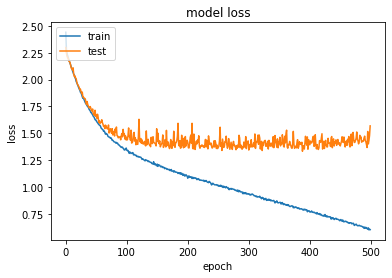

In [32]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the model

In [33]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\kesar\saved_models\Emotion_Voice_Detection_Model.h5 


In [34]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Loading the model

In [35]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 47.18%


# Predicting emotions on the test data

In [64]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

6/6 [==============================] - 0s 21ms/step


In [65]:
preds

array([[0.17352456, 0.25994307, 0.1309728 , ..., 0.01024791, 0.01319168,
        0.01559422],
       [0.05339563, 0.17030816, 0.18664989, ..., 0.04408742, 0.04959857,
        0.08632009],
       [0.04260015, 0.15701845, 0.01894369, ..., 0.05471371, 0.16142567,
        0.11298004],
       ...,
       [0.01141318, 0.02975521, 0.02214918, ..., 0.22104071, 0.24566199,
        0.19757834],
       [0.09836877, 0.16359848, 0.1776575 , ..., 0.02479063, 0.01952628,
        0.03052839],
       [0.11480284, 0.19656353, 0.13807884, ..., 0.00867137, 0.02779337,
        0.03068423]], dtype=float32)

In [66]:
preds1=preds.argmax(axis=1)

In [67]:
preds1

array([1, 2, 6, 0, 1, 3, 1, 4, 1, 1, 6, 2, 1, 4, 7, 9, 4, 7, 4, 9, 1, 7,
       6, 9, 1, 0, 6, 7, 1, 1, 9, 3, 6, 2, 3, 7, 0, 9, 0, 6, 4, 3, 1, 4,
       0, 2, 5, 1, 1, 3, 6, 1, 6, 0, 1, 9, 5, 1, 8, 6, 5, 0, 4, 1, 9, 7,
       1, 3, 1, 1, 6, 9, 2, 1, 9, 3, 3, 7, 1, 4, 4, 1, 5, 4, 7, 4, 2, 0,
       8, 1, 1, 1, 3, 3, 0, 1, 9, 4, 1, 0, 1, 0, 1, 6, 0, 1, 3, 3, 7, 6,
       9, 1, 1, 6, 1, 9, 1, 1, 2, 1, 2, 6, 1, 3, 5, 1, 1, 4, 4, 4, 5, 3,
       1, 5, 8, 9, 5, 7, 2, 5, 6, 3, 2, 0, 9, 4, 6, 1, 5, 4, 7, 7, 8, 3,
       6, 7, 5, 4, 7, 1, 8, 3, 1], dtype=int64)

In [68]:
abc = preds1.astype(int).flatten()

In [69]:
predictions = (lb.inverse_transform((abc)))

In [70]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_calm
1,female_fearful
2,male_calm
3,female_angry
4,female_calm
5,female_happy
6,female_calm
7,female_sad
8,female_calm
9,female_calm


In [71]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [72]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_angry
1,female_happy
2,female_angry
3,male_sad
4,female_calm
5,male_sad
6,female_sad
7,female_angry
8,female_calm
9,male_sad


In [73]:
finaldf = actualdf.join(preddf)

# Actual v/s Predicted emotions

In [76]:
finaldf

,actualvalues,predictedvalues
0,female_angry,female_calm
1,female_happy,female_fearful
2,female_angry,male_calm
3,male_sad,female_angry
4,female_calm,female_calm
...,...,...
158,male_fearful,male_fearful
159,female_happy,female_calm
160,male_fearful,male_happy
161,female_fearful,female_happy


In [77]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,12
female_calm,17
female_fearful,24
female_happy,14
female_sad,16
male_angry,11
male_calm,13
male_fearful,15
male_happy,19


In [78]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,13
female_calm,44
female_fearful,10
female_happy,17
female_sad,18
male_angry,11
male_calm,17
male_fearful,14
male_happy,5


In [79]:
finaldf.to_csv('Predictions.csv', index=False)